In [76]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
import datetime
from scipy.stats import linregress
import locale


In [77]:
# Make a reference to the comic_books_expanded.csv file path
csv_path_income = Path("Apple_Combined_Income_Statement.csv")
csv_path_aapl = Path("aapl.csv")

# Income_Statement Dataframe
income_statement_df = pd.read_csv(csv_path_income, encoding="utf-8")

# Check the special characters imported correctly
print (income_statement_df)

                                            Type           2020          2019  \
0                                Total net sales     274,515.00    260,174.00   
1                            Total cost of sales     169,559.00    161,782.00   
2                                   Gross margin     104,956.00     98,392.00   
3                            Operating expenses:            NaN           NaN   
4                       Research and development      18,752.00     16,217.00   
5            Selling, general and administrative      19,916.00     18,245.00   
6                       Total operating expenses      38,668.00     34,462.00   
7                               Operating income      66,288.00     63,930.00   
8                    Other income/(expense), net            803      1,807.00   
9       Income before provision for income taxes      67,091.00     65,737.00   
10                    Provision for income taxes       9,680.00     10,481.00   
11                          

In [78]:
#AAPL Dataframe 
aapl_df = pd.read_csv(csv_path_aapl, encoding="utf-8")

# Check the special characters imported correctly
print (aapl_df).head(5)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
0      4

AttributeError: 'NoneType' object has no attribute 'head'

In [79]:
#Converting Net Income Row to new df
net_income = {'Date':['2019-09-27', '2018-09-28', '2017-09-29', '2016-09-26', '2015-09-28', '2014-09-26', '2013-09-27', '2012-09-27', '2011-09-27', '2010-09-27', '2009-09-25'], 
                 'Net Income':['55,256', '59,531', '48,351','45,687','53,394', '39,510','37,037', '41,733', '25,922', '14,013', '8,235'], 
             }
net_income_df = pd.DataFrame.from_dict(net_income, orient='index')
net_income_df = net_income_df.transpose()
 
# Print the dataframe 
print(net_income_df) 

          Date Net Income
0   2019-09-27     55,256
1   2018-09-28     59,531
2   2017-09-29     48,351
3   2016-09-26     45,687
4   2015-09-28     53,394
5   2014-09-26     39,510
6   2013-09-27     37,037
7   2012-09-27     41,733
8   2011-09-27     25,922
9   2010-09-27     14,013
10  2009-09-25      8,235


In [80]:
net_income_df.dtypes

Date          object
Net Income    object
dtype: object

In [81]:
net_income_df['Date'] = pd.to_datetime(net_income_df['Date'], errors='coerce')

In [82]:
#net_income_df['Date'] = net_income_df['Date'].astype(float)
#net_income_df['Net Income'] = net_income_df['Net Income'].astype(str)

In [83]:
net_income_df["Date"] =pd.to_datetime(net_income_df.Date)

In [84]:
aapl_df['Date'] =pd.to_datetime(aapl_df.Date)

In [85]:
aapl_date_df = aapl_df.loc[(aapl_df['Date'] >= '2009-12-31')]

In [86]:
aapl_sales_combined_df = pd.merge(aapl_date_df,net_income_df, how ="outer",on = "Date")
aapl_sales_combined_df 

,Date,Open,High,Low,Close,Adj Close,Volume,Net Income
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,NaN
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,NaN
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800.0,NaN
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000.0,NaN
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200.0,NaN
...,...,...,...,...,...,...,...,...
3134,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300.0,NaN
3135,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000.0,NaN
3136,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900.0,NaN
3137,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500.0,NaN


In [87]:
aapl_sales_combined_df = aapl_sales_combined_df.dropna()
aapl_sales_combined_df

,Date,Open,High,Low,Close,Adj Close,Volume,Net Income
185,2010-09-27,10.499286,10.526071,10.393214,10.398571,8.890965,482834800.0,"14,013"
438,2011-09-27,14.597500,14.616071,14.216429,14.259286,12.191944,632497600.0,"25,922"
691,2012-09-27,23.724644,24.363214,23.583929,24.332857,20.894360,594090000.0,"41,733"
941,2013-09-27,17.277857,17.309643,17.168571,17.241072,15.157449,228040400.0,"37,037"
1192,2014-09-26,24.632500,25.187500,24.600000,25.187500,22.643364,249482000.0,"39,510"
1444,2015-09-28,28.462500,28.642500,28.110001,28.110001,25.702663,208436000.0,"53,394"
1695,2016-09-26,27.910000,28.347500,27.887501,28.219999,26.354937,119477600.0,"45,687"
1950,2017-09-29,38.302502,38.532501,38.000000,38.529999,36.618279,105199200.0,"48,351"
2201,2018-09-28,56.197498,56.459999,56.005001,56.435001,54.445862,91717600.0,"59,531"
2451,2019-09-27,55.134998,55.240002,54.320000,54.705002,53.595825,101408000.0,"55,256"


In [88]:
aapl_sales_combined_df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume               float64
Net Income            object
dtype: object

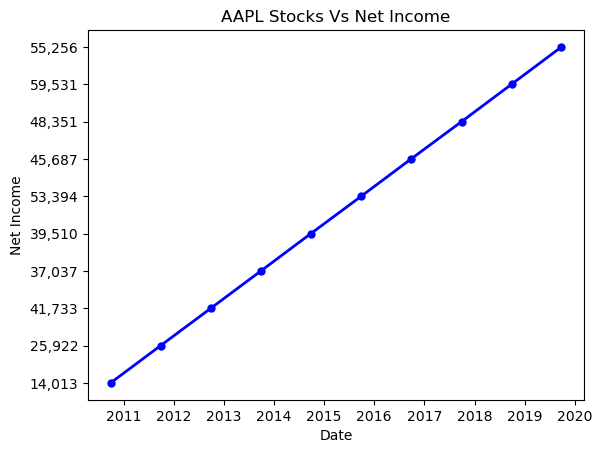

In [89]:
x_axis = aapl_sales_combined_df['Date']
y_axis = aapl_sales_combined_df['Net Income']
plt.plot(x_axis, y_axis,linewidth=2, markersize=5,marker="o",color="blue")
#aapl_date = plt.plot(["Date"],["Close"], color="red")
#net_income = plt.plot(["Date"],["Net Income"], color="blue")
plt.title("AAPL Stocks Vs Net Income")
plt.xlabel("Date")
plt.ylabel("Net Income")
plt.show()

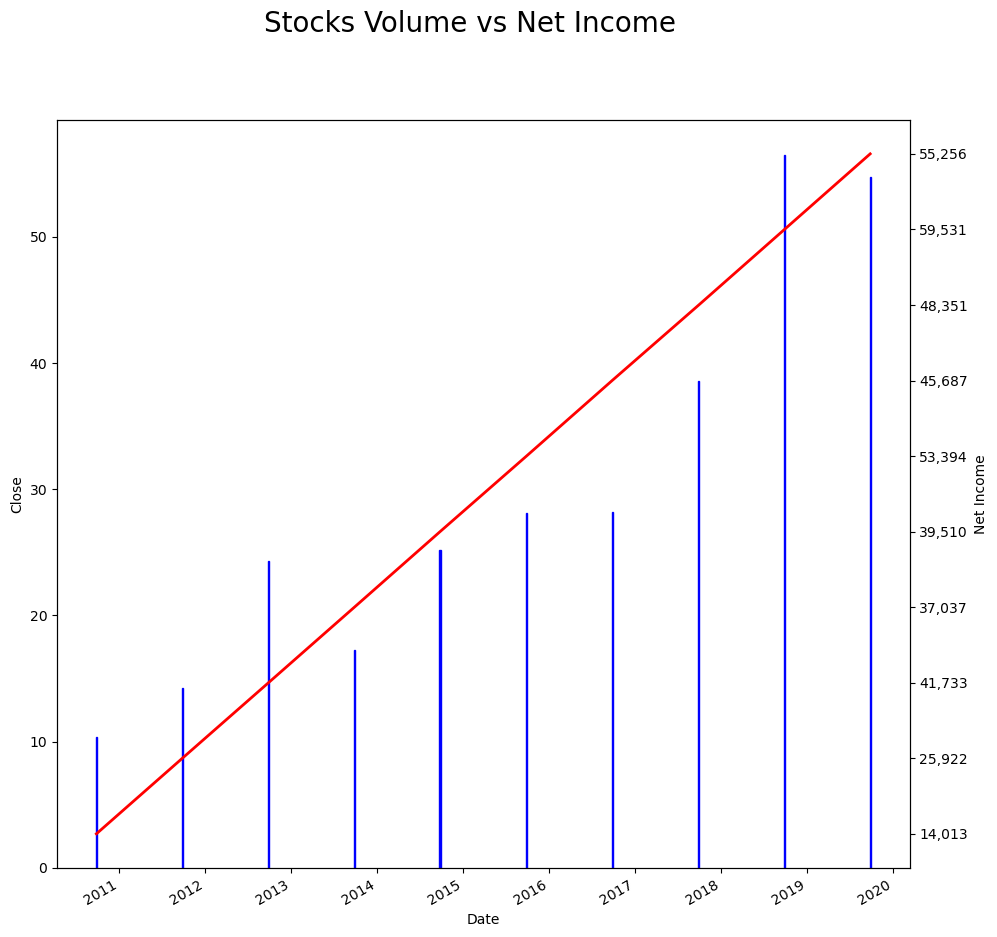

In [90]:
fig, ax1 = plt.subplots(figsize=(11, 11))
ax2 = ax1.twinx()

Date = aapl_sales_combined_df['Date']
Net_Income = aapl_sales_combined_df['Net Income']
Close = aapl_sales_combined_df['Close']

ax1.bar(Date, Close, color="blue", edgecolor="blue", width=5.0)
ax2.plot(Date, Net_Income, color="red", lw=2)

ax1.set_xlabel("Date")
ax1.set_ylabel("Close")
ax1.tick_params(axis="y")

ax2.set_ylabel("Net Income")
ax2.tick_params(axis="y")

fig.autofmt_xdate()
fig.suptitle("Stocks Volume vs Net Income", fontsize=20);

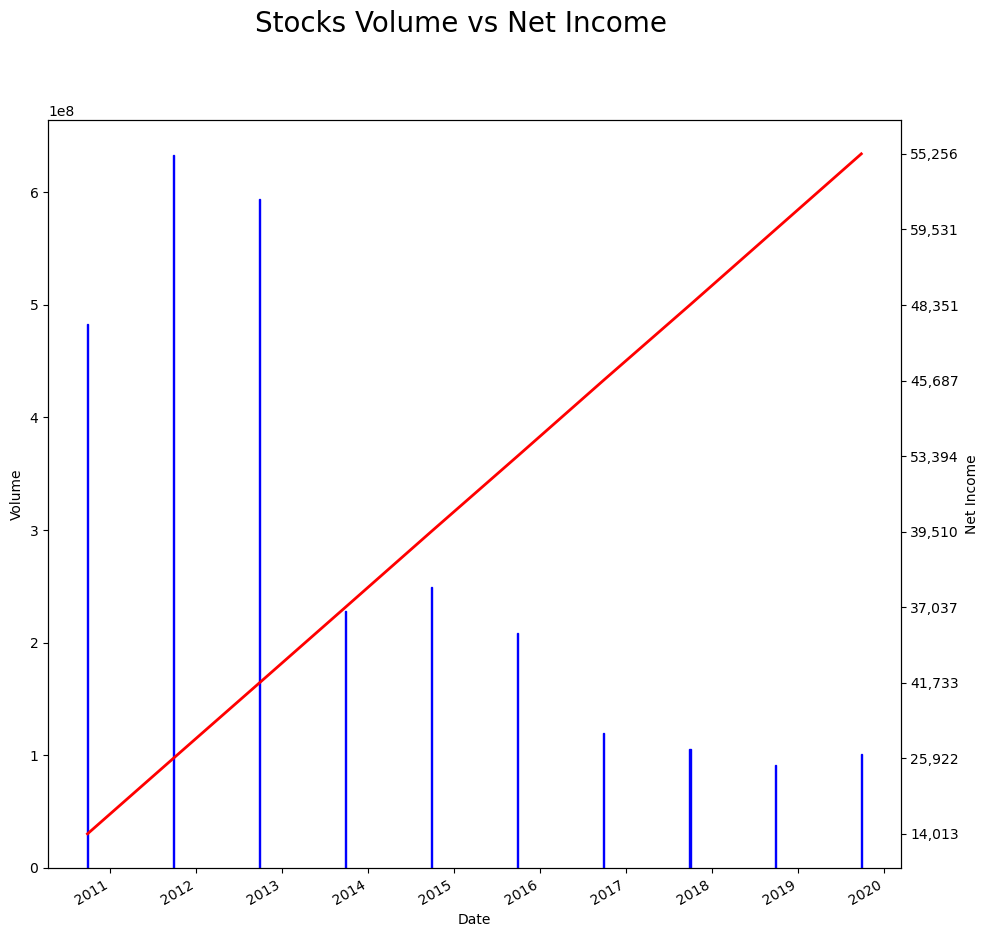

In [91]:
fig, ax1 = plt.subplots(figsize=(11, 11))
ax2 = ax1.twinx()

Date = aapl_sales_combined_df['Date']
Net_Income = aapl_sales_combined_df['Net Income']
Volume = aapl_sales_combined_df['Volume']


ax1.bar(Date, Volume, color="blue", edgecolor="blue", width=5.0)
ax2.plot(Date, Net_Income, color="red", lw=2)

ax1.set_xlabel("Date")
ax1.set_ylabel("Volume")
ax1.tick_params(axis="y")

ax2.set_ylabel("Net Income")
ax2.tick_params(axis="y")

fig.autofmt_xdate()
fig.suptitle("Stocks Volume vs Net Income", fontsize=20);

In [92]:
net_income_df['Net Income'] = net_income_df['Net Income'].astype(float)

ValueError: could not convert string to float: '55,256'

In [93]:
x_values = aapl_sales_combined_df['Volume']
y_values = aapl_sales_combined_df[float('Net Income')]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Net Income")
plt.ylabel("Volume")
print(f'The r-value is {rvalue}')

ValueError: could not convert string to float: 'Net Income'